In [1]:
#for data analysis
import numpy as np
import pandas as pd

#for visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#to ignore warnings
import warnings
warnings.simplefilter('ignore')

#for modelling 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

#for retrieving data from Quandl
import quandl
import math

In [2]:
quandl.ApiConfig.api_key = "piAQQkEvBw6U4-3g-VHf"

# Data Retrieval

In [3]:
df =quandl.get("WIKI/KO")

In [4]:
df

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
1962-01-02,101.00,103.7500,101.000,101.00,16800.0,0.0,1.0,0.262323,0.269465,0.262323,0.262323,1612800.0
1962-01-03,99.50,99.5000,97.250,98.75,32800.0,0.0,1.0,0.258427,0.258427,0.252583,0.256479,3148800.0
1962-01-04,99.00,100.2500,99.000,99.50,17600.0,0.0,1.0,0.257128,0.260375,0.257128,0.258427,1689600.0
1962-01-05,99.50,100.7500,97.000,97.25,29600.0,0.0,1.0,0.258427,0.261673,0.251934,0.252583,2841600.0
1962-01-08,96.50,96.5000,94.380,96.25,42400.0,0.0,1.0,0.250635,0.250635,0.245129,0.249986,4070400.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-21,43.13,43.4500,42.790,43.00,13029766.0,0.0,1.0,43.130000,43.450000,42.790000,43.000000,13029766.0
2018-03-22,42.88,43.3650,42.700,42.76,12134714.0,0.0,1.0,42.880000,43.365000,42.700000,42.760000,12134714.0
2018-03-23,42.82,43.1556,42.290,42.33,13190877.0,0.0,1.0,42.820000,43.155600,42.290000,42.330000,13190877.0


In [5]:
print(df)

              Open      High      Low   Close      Volume  Ex-Dividend  \
Date                                                                     
1962-01-02  101.00  103.7500  101.000  101.00     16800.0          0.0   
1962-01-03   99.50   99.5000   97.250   98.75     32800.0          0.0   
1962-01-04   99.00  100.2500   99.000   99.50     17600.0          0.0   
1962-01-05   99.50  100.7500   97.000   97.25     29600.0          0.0   
1962-01-08   96.50   96.5000   94.380   96.25     42400.0          0.0   
...            ...       ...      ...     ...         ...          ...   
2018-03-21   43.13   43.4500   42.790   43.00  13029766.0          0.0   
2018-03-22   42.88   43.3650   42.700   42.76  12134714.0          0.0   
2018-03-23   42.82   43.1556   42.290   42.33  13190877.0          0.0   
2018-03-26   42.61   42.8099   42.250   42.69  10939927.0          0.0   
2018-03-27   42.70   43.3100   42.525   42.89  11595357.0          0.0   

            Split Ratio  Adj. Open  A

In [6]:
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
1962-01-02,101.0,103.75,101.00,101.00,16800.0,0.0,1.0,0.262323,0.269465,0.262323,0.262323,1612800.0
1962-01-03,99.5,99.50,97.25,98.75,32800.0,0.0,1.0,0.258427,0.258427,0.252583,0.256479,3148800.0
1962-01-04,99.0,100.25,99.00,99.50,17600.0,0.0,1.0,0.257128,0.260375,0.257128,0.258427,1689600.0
1962-01-05,99.5,100.75,97.00,97.25,29600.0,0.0,1.0,0.258427,0.261673,0.251934,0.252583,2841600.0
1962-01-08,96.5,96.50,94.38,96.25,42400.0,0.0,1.0,0.250635,0.250635,0.245129,0.249986,4070400.0


In [7]:
df.tail()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2018-03-21,43.13,43.4500,42.790,43.00,13029766.0,0.0,1.0,43.13,43.4500,42.790,43.00,13029766.0
2018-03-22,42.88,43.3650,42.700,42.76,12134714.0,0.0,1.0,42.88,43.3650,42.700,42.76,12134714.0
2018-03-23,42.82,43.1556,42.290,42.33,13190877.0,0.0,1.0,42.82,43.1556,42.290,42.33,13190877.0
2018-03-26,42.61,42.8099,42.250,42.69,10939927.0,0.0,1.0,42.61,42.8099,42.250,42.69,10939927.0
2018-03-27,42.70,43.3100,42.525,42.89,11595357.0,0.0,1.0,42.70,43.3100,42.525,42.89,11595357.0


# Feature extraction and Feature engneering

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14155 entries, 1962-01-02 to 2018-03-27
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Open         14155 non-null  float64
 1   High         14155 non-null  float64
 2   Low          14155 non-null  float64
 3   Close        14155 non-null  float64
 4   Volume       14155 non-null  float64
 5   Ex-Dividend  14155 non-null  float64
 6   Split Ratio  14155 non-null  float64
 7   Adj. Open    14155 non-null  float64
 8   Adj. High    14155 non-null  float64
 9   Adj. Low     14155 non-null  float64
 10  Adj. Close   14155 non-null  float64
 11  Adj. Volume  14155 non-null  float64
dtypes: float64(12)
memory usage: 1.4 MB


In [45]:
#if there are any null values it will help us to show them by counting
df.isnull().sum()

Open           0
High           0
Low            0
Close          0
Volume         0
Ex-Dividend    0
Split Ratio    0
Adj. Open      0
Adj. High      0
Adj. Low       0
Adj. Close     0
Adj. Volume    0
HL_PCT         0
PCT_change     0
dtype: int64

In [46]:
#adjusted columns are the most ideal ones. regular columns here are prices on the day, but stocks have things called 
#"stock splits", where suddenly 1 share becomes something like 2 shares, thus the value of share be halved but the value
#of company has not halved

In [47]:
df_drop=df.drop(columns=['Open','High', 'Low', 'Close', 'Volume', 'Ex-Dividend', 'Split Ratio'])

In [48]:
print(df_drop)

            Adj. Open  Adj. High   Adj. Low  Adj. Close  Adj. Volume  \
Date                                                                   
1962-01-02   0.262323   0.269465   0.262323    0.262323    1612800.0   
1962-01-03   0.258427   0.258427   0.252583    0.256479    3148800.0   
1962-01-04   0.257128   0.260375   0.257128    0.258427    1689600.0   
1962-01-05   0.258427   0.261673   0.251934    0.252583    2841600.0   
1962-01-08   0.250635   0.250635   0.245129    0.249986    4070400.0   
...               ...        ...        ...         ...          ...   
2018-03-21  43.130000  43.450000  42.790000   43.000000   13029766.0   
2018-03-22  42.880000  43.365000  42.700000   42.760000   12134714.0   
2018-03-23  42.820000  43.155600  42.290000   42.330000   13190877.0   
2018-03-26  42.610000  42.809900  42.250000   42.690000   10939927.0   
2018-03-27  42.700000  43.310000  42.525000   42.890000   11595357.0   

              HL_PCT  PCT_change  
Date                        

In [49]:
#Historical patterns do give an insights into future prices, that is why we are gonna build some meaning full feature
# high low percentage and percentage change

In [51]:
df_drop['HL_PCT']=(df_drop['Adj. High']-df_drop['Adj. Low'])/df_drop['Adj. Close']*100.0
df_drop['PCT_change']=(df_drop['Adj. Close']-df_drop['Adj. Open'])/df_drop['Adj. Open']*100.0
print(df_drop)

            Adj. Open  Adj. High   Adj. Low  Adj. Close  Adj. Volume  \
Date                                                                   
1962-01-02   0.262323   0.269465   0.262323    0.262323    1612800.0   
1962-01-03   0.258427   0.258427   0.252583    0.256479    3148800.0   
1962-01-04   0.257128   0.260375   0.257128    0.258427    1689600.0   
1962-01-05   0.258427   0.261673   0.251934    0.252583    2841600.0   
1962-01-08   0.250635   0.250635   0.245129    0.249986    4070400.0   
...               ...        ...        ...         ...          ...   
2018-03-21  43.130000  43.450000  42.790000   43.000000   13029766.0   
2018-03-22  42.880000  43.365000  42.700000   42.760000   12134714.0   
2018-03-23  42.820000  43.155600  42.290000   42.330000   13190877.0   
2018-03-26  42.610000  42.809900  42.250000   42.690000   10939927.0   
2018-03-27  42.700000  43.310000  42.525000   42.890000   11595357.0   

              HL_PCT  PCT_change  
Date                        

In [11]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Ex-Dividend', 'Split Ratio',
       'Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume',
       'HL_PCT', 'PCT_change'],
      dtype='object')

In [15]:
df_drop.shape

(14155, 7)

In [16]:
df_drop.isnull().sum()

Adj. Open      0
Adj. High      0
Adj. Low       0
Adj. Close     0
Adj. Volume    0
HL_PCT         0
PCT_change     0
dtype: int64

In [17]:
df_drop.isna().sum()

Adj. Open      0
Adj. High      0
Adj. Low       0
Adj. Close     0
Adj. Volume    0
HL_PCT         0
PCT_change     0
dtype: int64

In [18]:
x = df_drop.describe()
print(x)

          Adj. Open     Adj. High      Adj. Low    Adj. Close   Adj. Volume  \
count  14155.000000  14155.000000  14155.000000  14155.000000  1.415500e+04   
mean      10.328644     10.412381     10.243999     10.333252  9.147155e+06   
std       12.701618     12.787281     12.618481     12.706384  7.932619e+06   
min        0.139866      0.140976      0.133837      0.138726  5.568000e+03   
25%        0.291334      0.293591      0.289110      0.291519  2.760000e+06   
50%        2.633555      2.663604      2.608941      2.638045  7.864700e+06   
75%       17.652654     17.852549     17.484096     17.663452  1.296170e+07   
max       48.210000     48.615000     47.740000     48.530000  1.241690e+08   

             HL_PCT    PCT_change  
count  14155.000000  14155.000000  
mean       1.763390      0.047946  
std        1.434640      1.291434  
min        0.000000    -23.750000  
25%        1.019682     -0.612252  
50%        1.475728      0.000000  
75%        2.158898      0.675676  


In [19]:
x = df_drop.corr()
print(x)

             Adj. Open  Adj. High  Adj. Low  Adj. Close  Adj. Volume  \
Adj. Open     1.000000   0.999956  0.999892    0.999915     0.438459   
Adj. High     0.999956   1.000000  0.999870    0.999959     0.439816   
Adj. Low      0.999892   0.999870  1.000000    0.999896     0.436663   
Adj. Close    0.999915   0.999959  0.999896    1.000000     0.438236   
Adj. Volume   0.438459   0.439816  0.436663    0.438236     1.000000   
HL_PCT       -0.075773  -0.072966 -0.085260   -0.075896     0.208484   
PCT_change   -0.002098   0.002201  0.002076    0.006036     0.018958   

               HL_PCT  PCT_change  
Adj. Open   -0.075773   -0.002098  
Adj. High   -0.072966    0.002201  
Adj. Low    -0.085260    0.002076  
Adj. Close  -0.075896    0.006036  
Adj. Volume  0.208484    0.018958  
HL_PCT       1.000000   -0.009142  
PCT_change  -0.009142    1.000000  


In [20]:
x = df_drop.cov()
x.style.bar(color = 'green')

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,HL_PCT,PCT_change
Adj. Open,161.331098,162.412097,160.257853,161.377973,44177825.922946,-1.380753,-0.034410
Adj. High,162.412097,163.514566,161.335154,162.473434,44613410.435883,-1.338563,0.036353
Adj. Low,160.257853,161.335154,159.226075,160.318606,43708949.111157,-1.543467,0.033829
Adj. Close,161.377973,162.473434,160.318606,161.452189,44171911.719058,-1.383518,0.099054
Adj. Volume,44177825.922946,44613410.435883,43708949.111157,44171911.719058,62926441151826.000000,2372646.189421,194213.122531
HL_PCT,-1.380753,-1.338563,-1.543467,-1.383518,2372646.189421,2.058192,-0.016937
PCT_change,-0.034410,0.036353,0.033829,0.099054,194213.122531,-0.016937,1.667801


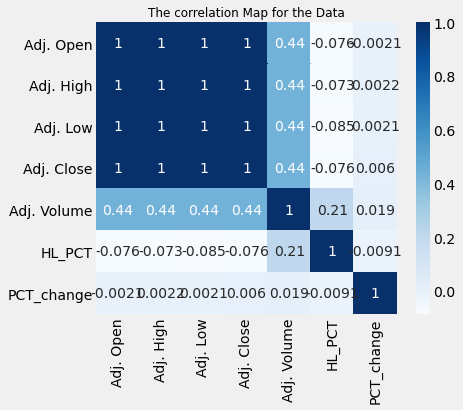

In [21]:
plt.rcParams['figure.figsize'] = (6, 5)
plt.style.use('fivethirtyeight')

sns.heatmap(df_drop.corr(),
            cmap = 'Blues',
            annot = True)
plt.title('The correlation Map for the Data', fontsize = 12)
plt.show()

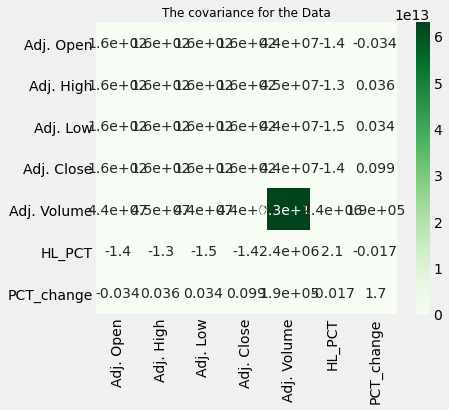

In [22]:
plt.rcParams['figure.figsize'] = (6, 5)
plt.style.use('fivethirtyeight')

sns.heatmap(df_drop.cov(),
            cmap = 'Greens',
            annot = True)
plt.title('The covariance for the Data', fontsize = 12)
plt.show()

In [23]:
# After plotting corelation chart6 we caqn see that the corelation between Adj.open, Adj.high,Adj.low,Adj.close have a 
#corelation of 1 thats why i use Adj.close in behalf of them
new_df = pd.DataFrame(data=df_drop,columns=['PCT_Change','HL_PCT','Adj. Volume','Adj.Close'])

In [24]:
#so the new dataframe is:-
new_df

,PCT_Change,HL_PCT,Adj. Volume,Adj.Close
Date,,,,
1962-01-02,NaN,2.722772,1612800.0,NaN
1962-01-03,NaN,2.278481,3148800.0,NaN
1962-01-04,NaN,1.256281,1689600.0,NaN
1962-01-05,NaN,3.856041,2841600.0,NaN
1962-01-08,NaN,2.202597,4070400.0,NaN
...,...,...,...,...
2018-03-21,NaN,1.534884,13029766.0,NaN
2018-03-22,NaN,1.555192,12134714.0,NaN
2018-03-23,NaN,2.044885,13190877.0,NaN


In [132]:
#filling up of nan with -999999999 we can also fill it with 0000
new_df1=new_df.fillna(-999999999,axis=1)

In [112]:
new_df1

,PCT_Change,HL_PCT,Adj. Volume,Adj.Close
Date,,,,
1962-01-02,-999999999.0,2.722772,1612800.0,-999999999.0
1962-01-03,-999999999.0,2.278481,3148800.0,-999999999.0
1962-01-04,-999999999.0,1.256281,1689600.0,-999999999.0
1962-01-05,-999999999.0,3.856041,2841600.0,-999999999.0
1962-01-08,-999999999.0,2.202597,4070400.0,-999999999.0
...,...,...,...,...
2018-03-21,-999999999.0,1.534884,13029766.0,-999999999.0
2018-03-22,-999999999.0,1.555192,12134714.0,-999999999.0
2018-03-23,-999999999.0,2.044885,13190877.0,-999999999.0


In [131]:
# add a column name "label". we are gonna take 10 percent of NUmber of date in the future prices. if we predict 10 days out
# actually we can generate a prediction for every day for the nexst 10 days

In [113]:
forecast_col='Adj.Close'
forecast_out=int(math.ceil(0.1*len(new_df1)))

In [114]:
new_df1['label']=new_df1[forecast_col].shift(-forecast_out)

In [115]:
new_df1

,PCT_Change,HL_PCT,Adj. Volume,Adj.Close,label
Date,,,,,
1962-01-02,-999999999.0,2.722772,1612800.0,-999999999.0,-999999999.0
1962-01-03,-999999999.0,2.278481,3148800.0,-999999999.0,-999999999.0
1962-01-04,-999999999.0,1.256281,1689600.0,-999999999.0,-999999999.0
1962-01-05,-999999999.0,3.856041,2841600.0,-999999999.0,-999999999.0
1962-01-08,-999999999.0,2.202597,4070400.0,-999999999.0,-999999999.0
...,...,...,...,...,...
2018-03-21,-999999999.0,1.534884,13029766.0,-999999999.0,NaN
2018-03-22,-999999999.0,1.555192,12134714.0,-999999999.0,NaN
2018-03-23,-999999999.0,2.044885,13190877.0,-999999999.0,NaN


In [116]:
new_df1.dropna(axis=0,how='any',inplace=True)

In [117]:
new_df1.isnull().sum()

PCT_Change     0
HL_PCT         0
Adj. Volume    0
Adj.Close      0
label          0
dtype: int64

In [118]:
x =new_df1.drop(columns=['label'])

In [119]:
y = new_df1['label']

In [120]:
x.head()

,PCT_Change,HL_PCT,Adj. Volume,Adj.Close
Date,,,,
1962-01-02,-999999999.0,2.722772,1612800.0,-999999999.0
1962-01-03,-999999999.0,2.278481,3148800.0,-999999999.0
1962-01-04,-999999999.0,1.256281,1689600.0,-999999999.0
1962-01-05,-999999999.0,3.856041,2841600.0,-999999999.0
1962-01-08,-999999999.0,2.202597,4070400.0,-999999999.0


In [121]:
y.head()

Date
1962-01-02   -999999999.0
1962-01-03   -999999999.0
1962-01-04   -999999999.0
1962-01-05   -999999999.0
1962-01-08   -999999999.0
Name: label, dtype: float64

## Normalization of the data by the use of min max scaler

In [122]:
from sklearn.preprocessing import MinMaxScaler

In [123]:
scaler = MinMaxScaler()
new_x = scaler.fit_transform(x)
print(new_x)

[[0.         0.03024164 0.01294449 0.        ]
 [0.         0.02530693 0.02531528 0.        ]
 [0.         0.01395343 0.01356303 0.        ]
 ...
 [0.         0.01349376 0.09526663 0.        ]
 [0.         0.00867729 0.07388514 0.        ]
 [0.         0.01709829 0.10290656 0.        ]]


In [124]:
scaler = MinMaxScaler()
new_y=scaler.fit(y.values.reshape(-1,1))

In [125]:
print(new_y)

MinMaxScaler()


# training of data

In [133]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1,random_state=0)

# modelling of data

In [134]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [135]:
y_pred = regressor.predict(x_test)

# model evaluation

In [129]:
Accuracy_score = r2_score(y_pred,y_test)

In [130]:
Accuracy_score

1.0